In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
df = pd.read_pickle('../data/highered_cleaned.pkl')
data_dict = pd.read_pickle('../data/data_dictionary.pkl')

In [3]:
df.shape

(137936, 29)

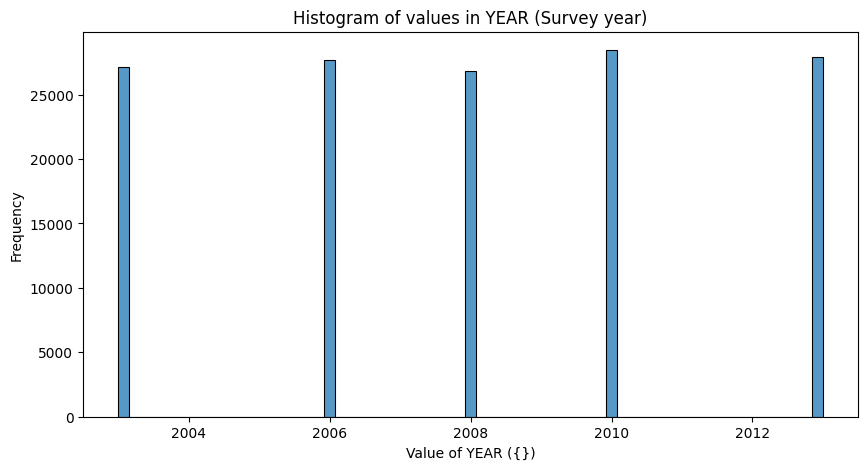

In [4]:
plot_histogram(df, 'YEAR', data_dict)

In [5]:
df['JOBSATIS'].unique()

array([2, 1, 3, 4])

The number of respondents is balanced across the discrete survey years.

In [ ]:
df.columns

In [ ]:
for col in df.columns:
    plot_histogram(df, col, data_dict)

In [ ]:
plt.hist(df['YEAR'])

### SALARY: Salary (annualized)

In [ ]:
df['SALARY'].min()

In [ ]:
df['SALARY'].max()

In [ ]:
sns.histplot(df['SALARY'])

In [ ]:
df.columns

In [ ]:
plot_histogram(df, 'SALARY', data_dict)

In [ ]:
# plt.scatter(df[colname],df[colname])

In [ ]:
df.columns[10:]

In [ ]:
df[df['SALARY']!=9999998.0]['SALARY']

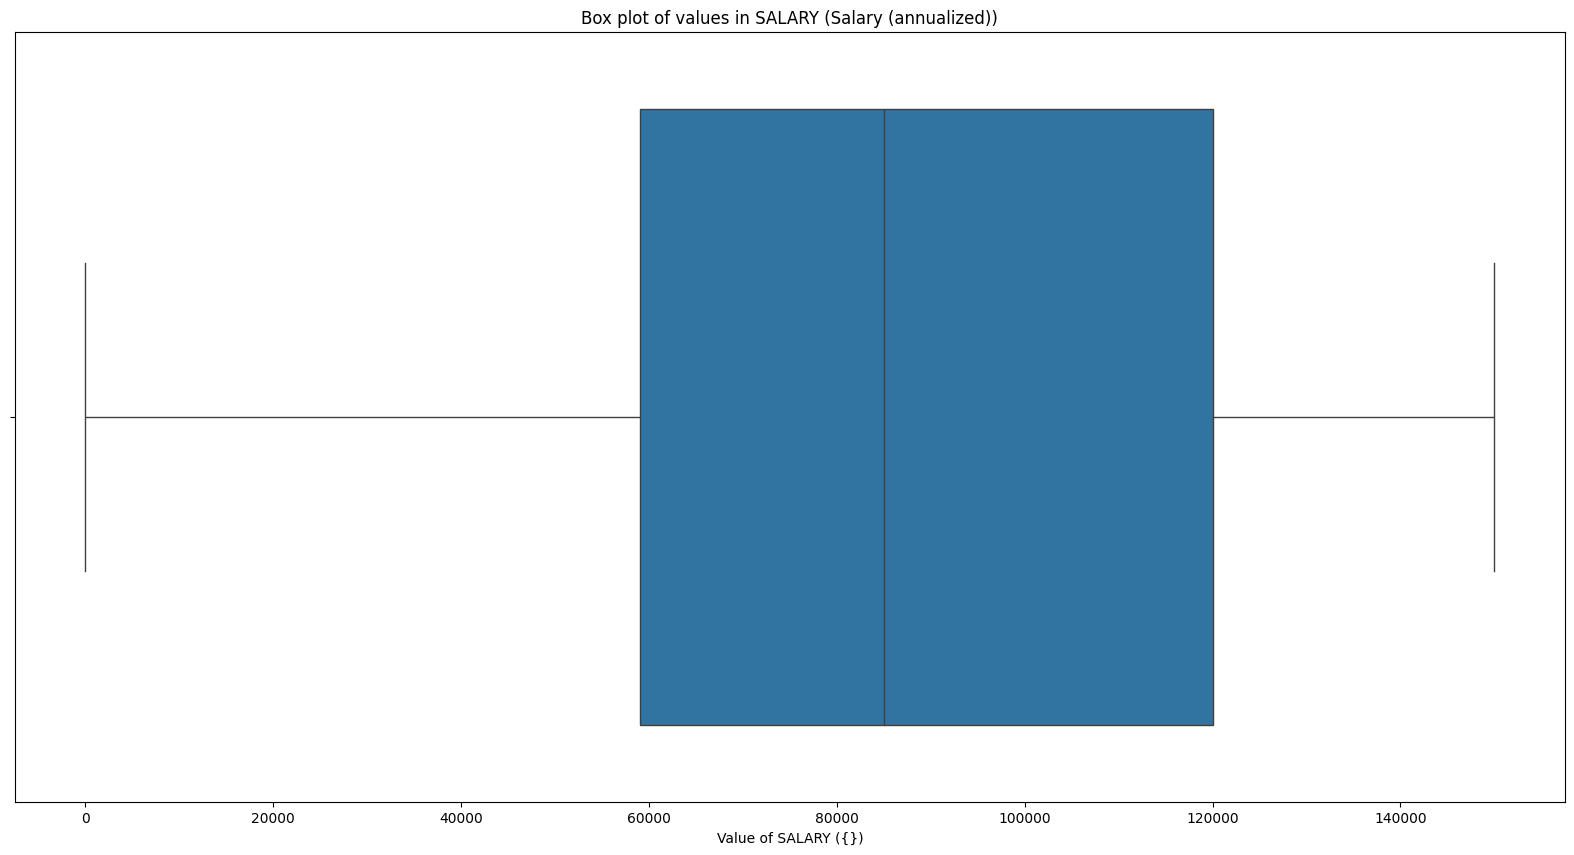

In [8]:
colname = 'SALARY'
# setting variables
desc = data_dict[colname]['var_desc_short']
vals = data_dict[colname]['data_values']
# plotting figure
plt.figure(figsize=(20,10))
sns.boxplot(df[df['SALARY']!=9999998.0]['SALARY'],orient='h')
plt.xlabel(f'Value of {colname} ({vals})')
# plt.ylabel('Frequency')
plt.title(f'Box plot of values in {colname} ({desc})')
# plt.savefig(f'../img/eda/{colname}_hist.jpeg',dpi=900)
plt.show()

In [ ]:
df3 = df[df['SALARY']!=9999998.0]

In [9]:
def plot_violinplots_by_category(df, x_colname, y_colname):
    # x_colname must be numeric
    # y_colname must be the categorical value, which will automatically be converted to str
    y_colname_str = df[y_colname].apply(str)
    sns.violinplot(x=df[x_colname], y=y_colname_str, 
                   hue=df[y_colname], order=np.sort(y_colname_str.unique()))
    plt.title(f'Distribution of {x_colname} by {y_colname}')
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    plt.grid(alpha=0.2)
    plt.savefig(f'../img/eda/{x_colname}_{y_colname}_violin.jpeg',dpi=900)
    plt.show()

In [ ]:
def plot_histogram(df, colname, data_dict):
    # setting variables
    desc = data_dict[colname]['var_desc_short']
    vals = data_dict[colname]['data_values']
    # plotting figure
    plt.figure(figsize=(10,5))
    sns.histplot(df[colname])
    plt.xlabel(f'Value of {colname} ({vals})')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of values in {colname} ({desc})')
    plt.savefig(f'../img/eda/{colname}_hist.jpeg',dpi=900)
    plt.show()

In [ ]:
df.columns

In [6]:
data_dict['JOBSATIS']['data_values']

{1: 'Very satisfied',
 2: 'Somewhat satisfied',
 3: 'Somewhat dissatisfied',
 4: 'Very dissatisfied',
 98: 'Logical Skip'}

In [ ]:
data_dict['JOBSATIS']['data_values']

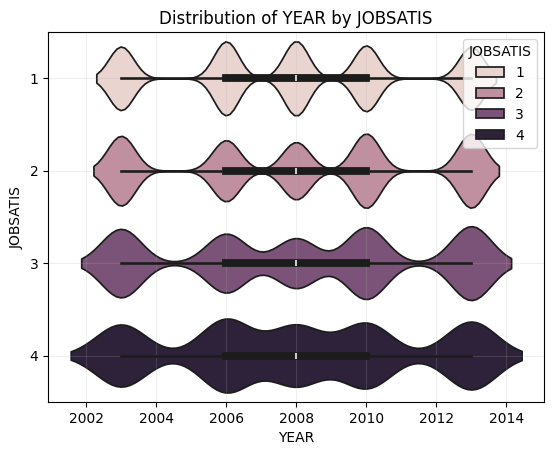

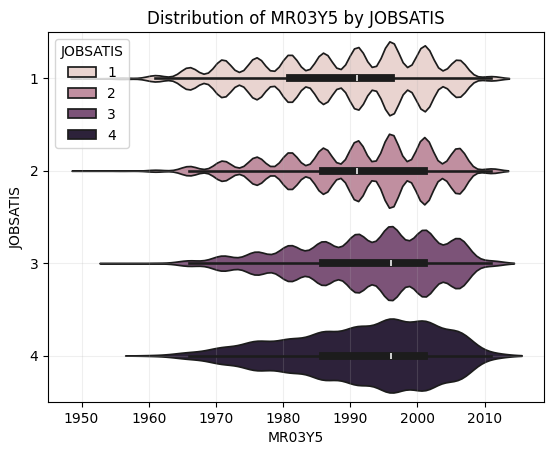

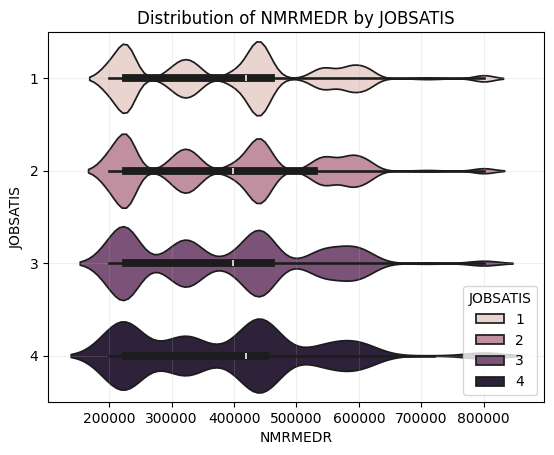

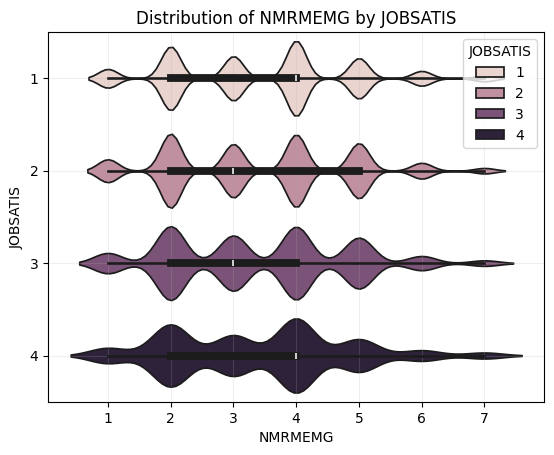

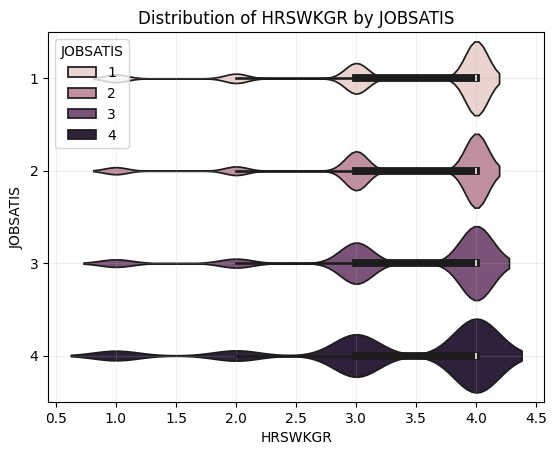

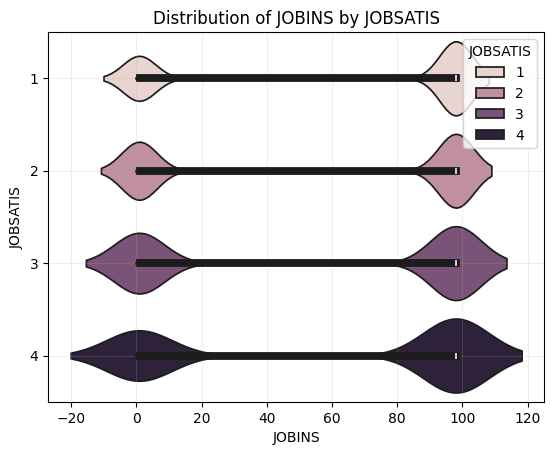

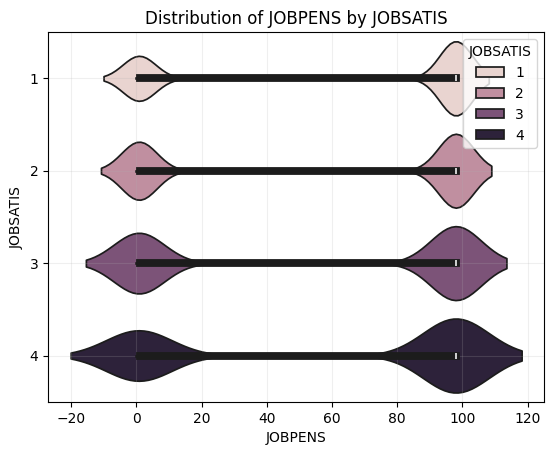

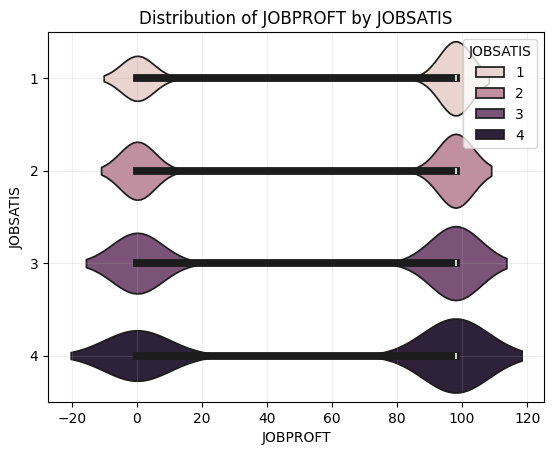

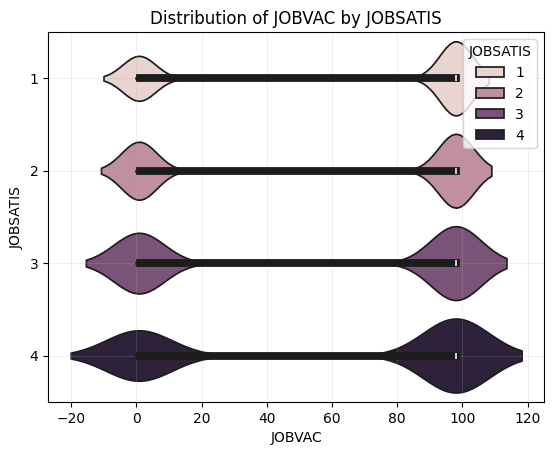

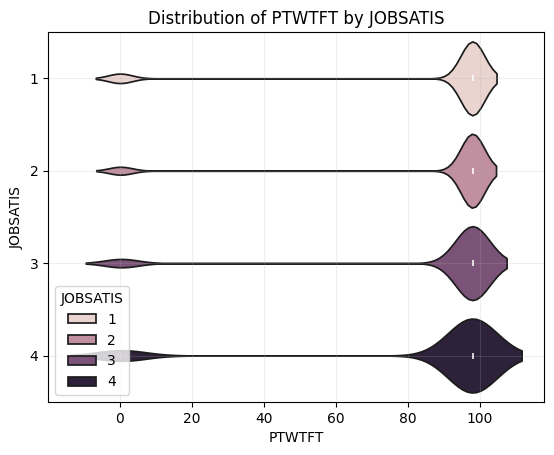

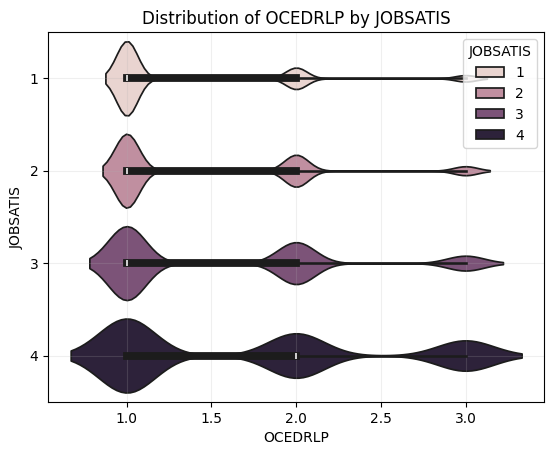

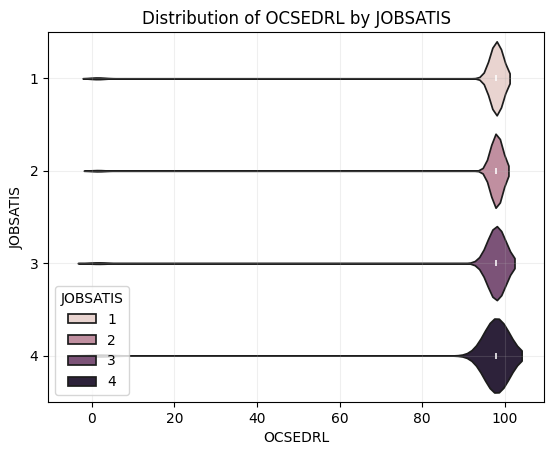

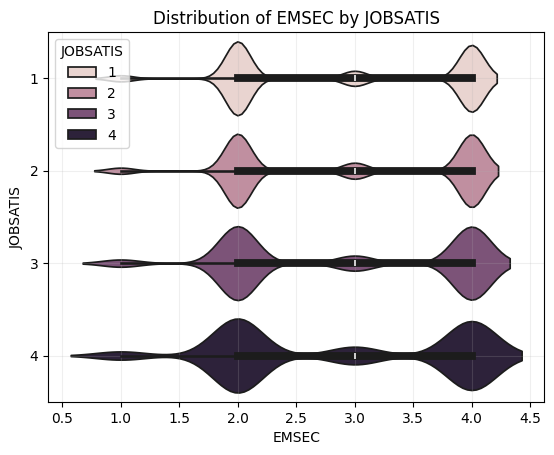

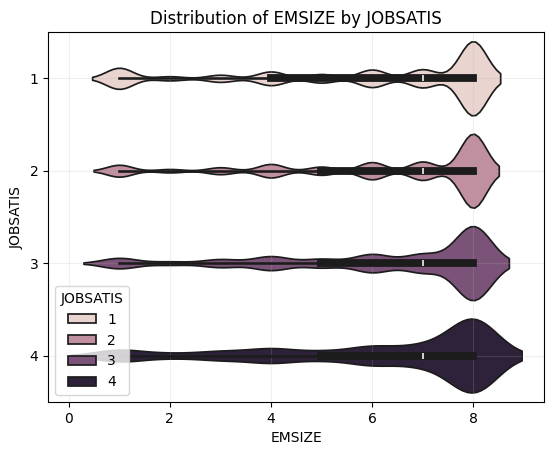

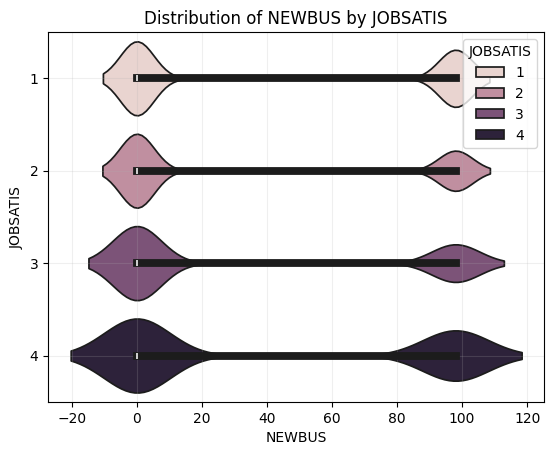

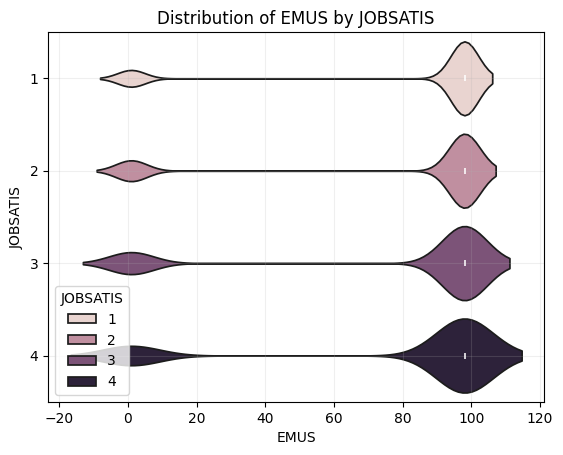

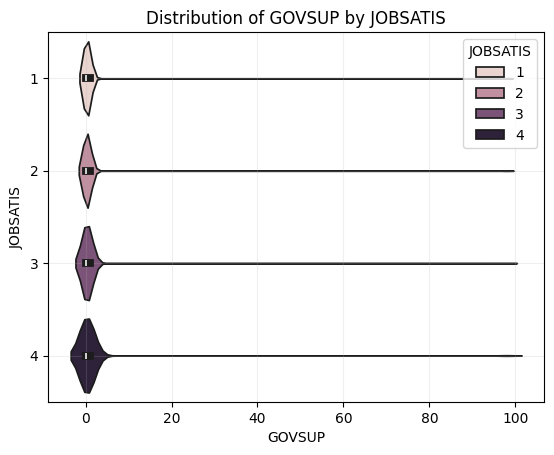

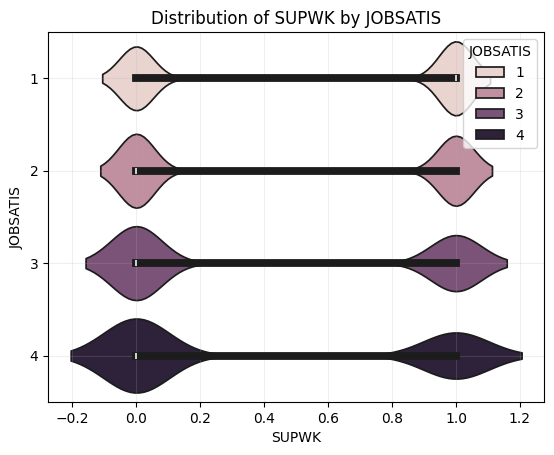

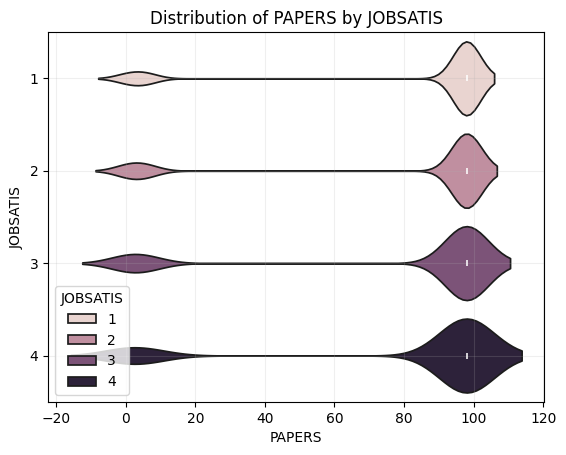

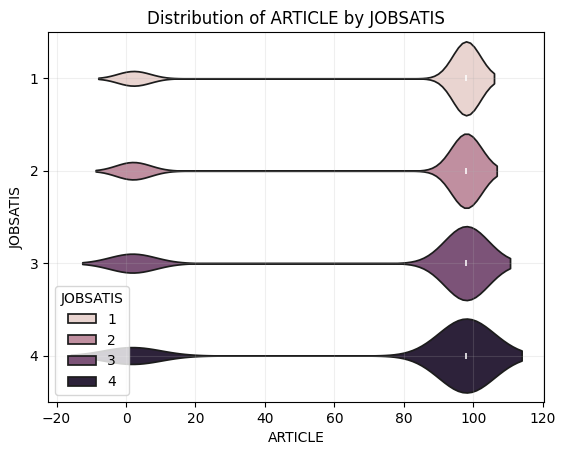

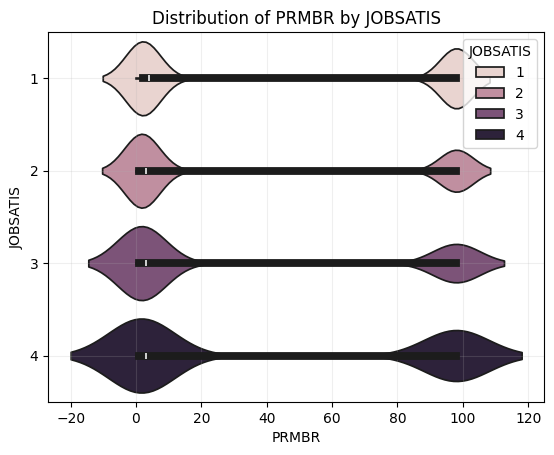

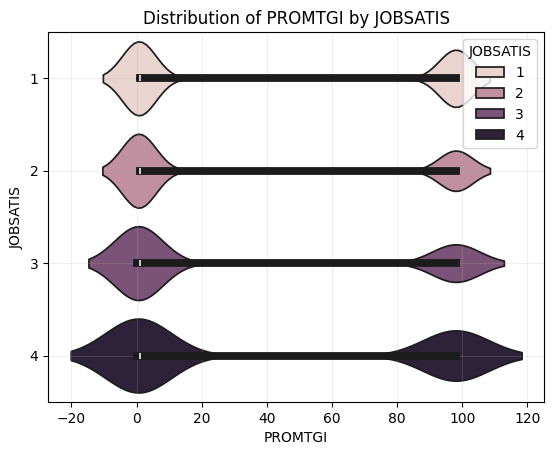

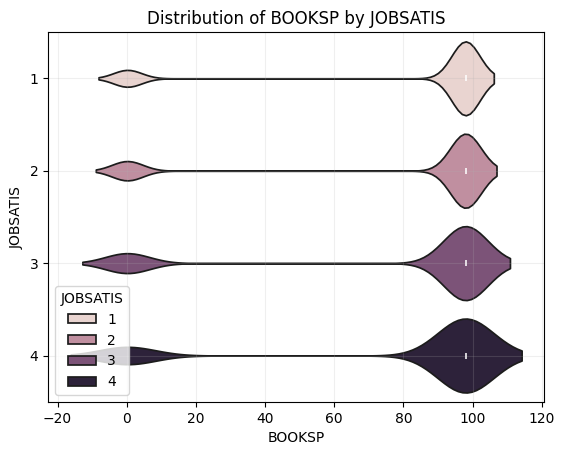

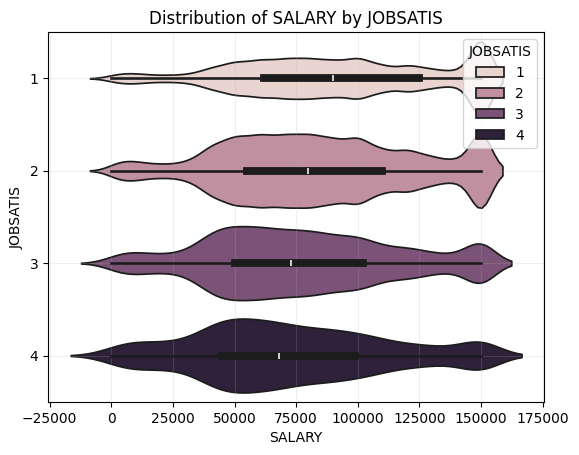

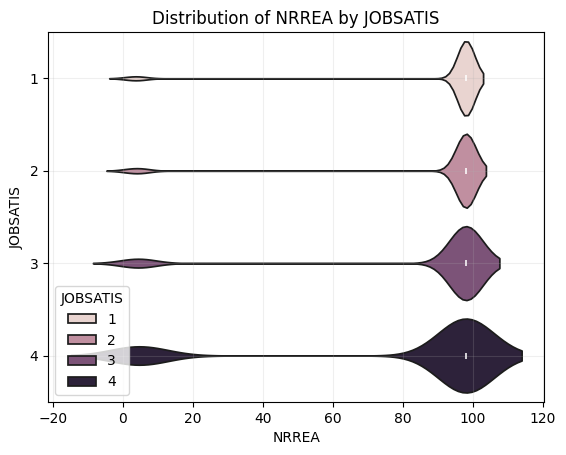

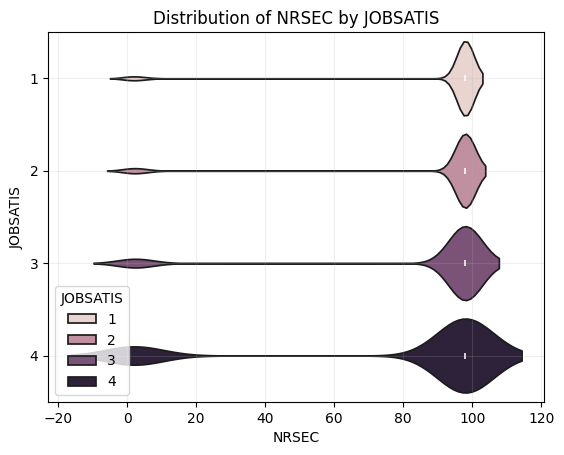

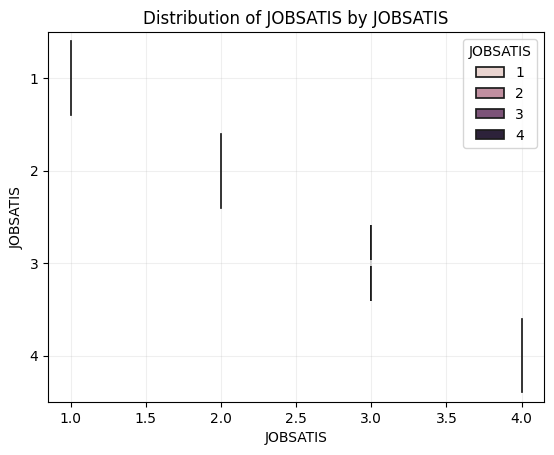

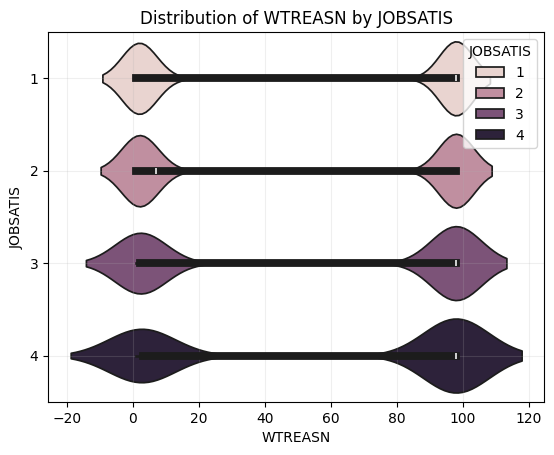

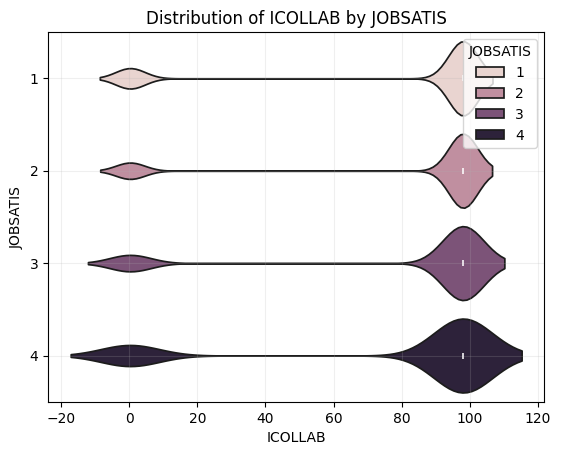

In [10]:
for col in df.columns:
    plot_violinplots_by_category(df, col, 'JOBSATIS')

In [ ]:
# for x_col in df2.columns:
#     for y_col in df2.columns:
#         plot_violinplots_by_category(df2, x_col, y_col)

In [ ]:
import matplotlib
corr = df3.corr()
corr.style.background_gradient('coolwarm')
# plt.savefig("../img/eda/corr.jpeg",dpi=900)

In [ ]:
df4 = df3.copy()
df4 = df4.drop(['MRDG','LFSTAT','WRKG'],axis=1)
df4.shape

In [ ]:
corr = df4.corr()
corr.style.background_gradient('coolwarm')

In [ ]:
corr = df2.corr()
corr.style.background_gradient('coolwarm')

In [ ]:
# applying mask
mask = np.triu(np.ones_like(corr))
 
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr, mask=mask,
            annot=True, fmt='0.1f')
corr.style.background_gradient('coolwarm')

In [ ]:
# applying mask
mask = np.triu(np.ones_like(corr))
 
# plotting a triangle correlation heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask=mask)
corr.style.background_gradient('coolwarm')
# displaying heatmap
plt.show()